# Using KNN Algorithm to predict if a person will have diabetes or not

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

### loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with Zero as values with mean of respective column

In [4]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for col in zero_not_accepted:
    for i in data[col]:
        if i==0:
            colSum = sum(data[col])
            meanCol=colSum/len(data[col])
            data[col]=meanCol

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)


### extracting independent variables

In [6]:
X = data.iloc[:,0:8]
print(X.head())

   Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
0            6  120.894531      69.105469      20.536458  79.799479   
1            1  120.894531      69.105469      20.536458  79.799479   
2            8  120.894531      69.105469      20.536458  79.799479   
3            1  120.894531      69.105469      20.536458  79.799479   
4            0  120.894531      69.105469      20.536458  79.799479   

         BMI  DiabetesPedigreeFunction  Age  
0  31.992578                     0.627   50  
1  31.992578                     0.351   31  
2  31.992578                     0.672   32  
3  31.992578                     0.167   21  
4  31.992578                     2.288   33  


### extracting dependent variable

In [7]:
y = data.iloc[:,8]

### Explorning data to know relation before processing

<Axes: >

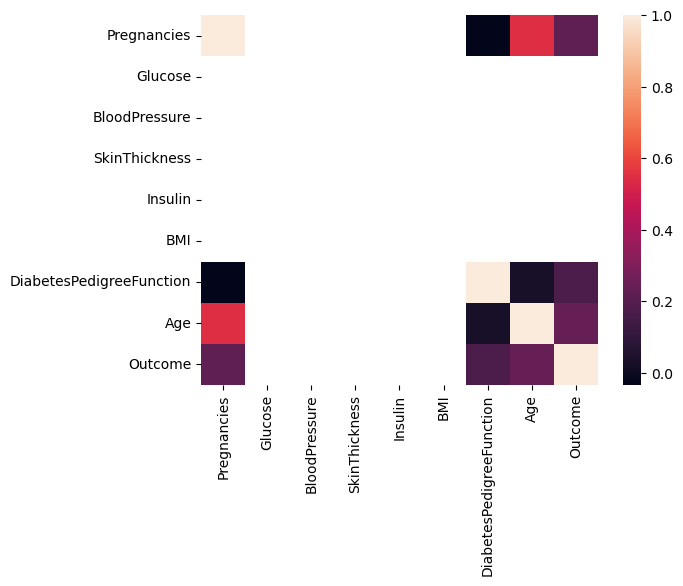

In [8]:
sns.heatmap(data.corr())    

### splitting dataset into training and testing set

In [10]:
y = np.array(data['Outcome'])
Data=copy.deepcopy(data)
del Data['Outcome']
X = np.array(Data)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
print (" Training Data Set Dimensions=", X_train.shape, "Training True Class labels dimensions", y_train.shape) 
print (" Test Data Set Dimensions=", X_test.shape, "Test True Class labels dimensions", y_test.shape)  

 Training Data Set Dimensions= (614, 8) Training True Class labels dimensions (614,)
 Test Data Set Dimensions= (154, 8) Test True Class labels dimensions (154,)


In [11]:
# print some values from all the X_train, y_train, X_test, y_test 
# print first value of X_train dataframe
print(type(X_train))    

print ("X_train[1,:]=", X_train[1,:])
# print first value of y_train dataframe
print ("y_train[1]=", y_train[1])
# print first value of X_test dataframe
print ("X_test[1,:]=", X_test[1,:])
# print first value of y_test dataframe
print ("y_test[1]=", y_test[1])


<class 'numpy.ndarray'>
X_train[1,:]= [  2.         120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   1.698       28.        ]
y_train[1]= 0
X_test[1,:]= [  2.         120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   0.191       25.        ]
y_test[1]= 0


#### Euclidean Distance Formula 

In [25]:
import math
def Euclidian_Distance(Observe,Actual):
    distance=0
    for x in range(len(Observe)):
        distance += pow((Observe[x] - Actual[x]), 2)
    return math.sqrt(distance)

### You need to Implement Model on above train and test data

In [26]:
# 1) You have to implement the Model using above Data
# 2) predict your model on test data
# 3) Calculate Accuracy at the end
## Your code goes here..

In [27]:
def getKNearest(distances,k):
    print(f'coming in getKNearest with distances {distances} and k {k}  ')
    # Sort on the basis of distances
    distances.sort(key=lambda x: x[0])
    dist = []
    # Get top k distances from the list of values
    for i in range(k):
        dist.append(distances.pop(0))
    print(f'output returning of getKNearest distances {dist}')
    return dist

In [28]:
def getMaxClass(classes):
    print(f'coming input classes {classes}' )
    # Get the Max Class using np unique to get the count of each class
    v, c = np.unique(classes, return_counts = True)
    print(f'values of v {v} and c {c}' )
    c = c.tolist()
    max_val = max(c)
    print(f'max value received {max_val}')
    # Return the class with the maximum value
    index = c.index(max_val)
    print(f'index of max value {index} and value returning {v[index]}')
    return v[index]
    

In [29]:
def getClasses(k_nearest):
    print(f'coming here {k_nearest}')
    # From the tuples list - k_nearest, fetch the classes only and return their list
    c = []
    for tup in k_nearest:
        c.append(tup[1])
    print(f'output returning {c}')
    return c

In [30]:
# Using the KNN Supervised Learning Algorithm for the model
# It will help us classify the quality of wheat seeds

# take only the first 5 values of X_train and y_train for training 
# you can increase the size of train and test data and remove the extra 
# outputs after understading to get better results and accuracy
X_train = X_train[0:5,:]
y_train = y_train[0:5]

def KNN(X_train, X_test, y_train, k):
    predictions = []
    # Iterate over the entire test set
    for test in X_test:
        print(f"test {test} ")
        info = []
        # Iterate over the etire training set
        for i, train in enumerate(X_train):
            print(f"train {train}  and y_train {y_train[i]} and i {i}")
            # Calculate the euclidean Distance of both the instances
            val =Euclidian_Distance(test, train)
            # Add the eucl. dist and the label to the info list
            print(f"val {val} and y_train {y_train[i]} and i {i}")
            info.append((val, y_train[i]))
            print(f"info {info}")
        # Find the k nearest info labels
        k_nearests = getKNearest(info,k)
        # Get the classes from the info labels
        classes = getClasses(k_nearests)
        # The predicted class will be the one with the highest score
        pred = getMaxClass(classes)
        # Add to the predictions list
        predictions.append(pred)
        
    return predictions

In [31]:
#Lets see how good we are doing, by finding the accuracy on the test set..

def Accuracy (prediction,Ytest):
  correct = 0.0
  for i in range (len(prediction)):
    if (prediction[i] == Ytest[i]):
        correct += 1  

  accuracy = correct/len(Ytest)
  print ("Accuracy Score is: ", accuracy)

In [32]:
# Running on k = 3 and very small data just for your understanding
preds = KNN(X_train,X_test,y_train, 3)
print(preds)
Accuracy(preds, y_test) 

test [  1.    199.     76.     43.    155.     42.9     1.394  22.   ] 
train [ 5.    99.    54.    28.    83.    34.     0.499 30.   ]  and y_train 0 and i 0
val 126.70047760367757 and y_train 0 and i 0
info [(126.70047760367757, 0)]
train [ 3.    81.    86.    16.    66.    27.5    0.306 22.   ]  and y_train 0 and i 1
val 151.3814511226524 and y_train 0 and i 1
info [(126.70047760367757, 0), (151.3814511226524, 0)]
train [  0.     73.     72.     29.    155.     21.1     0.342  25.   ]  and y_train 0 and i 2
val 128.74139467941148 and y_train 0 and i 2
info [(126.70047760367757, 0), (151.3814511226524, 0), (128.74139467941148, 0)]
train [  0.    100.     88.     60.    110.     46.8     0.962  31.   ]  and y_train 0 and i 3
val 111.15932990082298 and y_train 0 and i 3
info [(126.70047760367757, 0), (151.3814511226524, 0), (128.74139467941148, 0), (111.15932990082298, 0)]
train [  9.    145.     88.     34.    165.     30.3     0.771  53.   ]  and y_train 1 and i 4
val 66.521786874677

In [34]:
### JUST FOR CHECKING what was actual class labels and what model predicted #####
print(y_test)
print(preds)

[1 1]
[0, 0]


##### you can increase the size of train and test data and remove the extra outputs after understading to get better results and accuracy